***Load the dataset:**
Preprocess the dataset Include necessary data preprocessing steps, such as **handling missing values**, **encoding categorical variables**, and **scaling features**.

Identify and **separate the target variable** from the dataset. The target variable indicates the presence or absence of heart disease.

**Split the dataset** into training and testing sets (e.g., 80% training, 20% testing).

**Train and evaluate the following algorithms:**

● Logistic Regression

● Decision Tree Classifier

● Random Forest Classifier

● Gradient Boosting Classifier

● Support Vector Machine (SVM)

For each algorithm, c**alculate and compare the following metrics**:

● Gini Coefficient (use AUC score for binary classification)

● Confusion Matrix

● Accuracy

● Precision

● Recall

● F1 Score

● AUC-ROC Curve

Report Findings:
**bold text**
Summarize the **performance of each model**. Discuss which **model performed best based on the evaluation metrics.**

In [ ]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the numpy library for numerical operations
import numpy as np

# Importing the seaborn library for statistical data visualization
import seaborn as sns

# Importing the matplotlib library's pyplot module for plotting
import matplotlib.pyplot as plt


In [ ]:
heart_data = pd.read_csv("heart_disease_cleaned.csv")

In [ ]:
heart_data.shape

(919, 16)

In [ ]:
heart_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# Check for missing values
missing_values = heart_data.isnull().sum()
missing_values


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    bool   
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    bool   
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 102.4+ KB


In [ ]:
# Identify categorical columns
categorical_cols = heart_data.select_dtypes(include=['object']).columns

# Perform one-hot encoding
heart_data_encoded = pd.get_dummies(heart_data, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded dataset
heart_data_encoded.head()


,id,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,63,145.0,233.0,True,150.0,False,2.3,0.0,0,...,False,False,False,True,False,False,False,False,False,False
1,2,67,160.0,286.0,False,108.0,True,1.5,3.0,2,...,False,False,False,False,False,False,True,False,True,False
2,3,67,120.0,229.0,False,129.0,True,2.6,2.0,1,...,False,False,False,False,False,False,True,False,False,True
3,4,37,130.0,250.0,False,187.0,False,3.5,0.0,0,...,False,False,True,False,True,False,False,False,True,False
4,5,41,130.0,204.0,False,172.0,False,1.4,0.0,0,...,False,True,False,False,False,False,False,True,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = heart_data_encoded.drop(columns=['num'])  # Assuming 'target' is the column name for heart disease
y = heart_data_encoded['num']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

In [ ]:
# Check the unique values in the target column
unique_values = y.unique()
print("Unique values in target variable:", unique_values)

Unique values in target variable: [0 2 1 3 4]


In [ ]:
# If necessary, convert other values to 1 (disease)
if len(unique_values) > 2:
    y = y.apply(lambda x: 1 if x != 0 else 0)


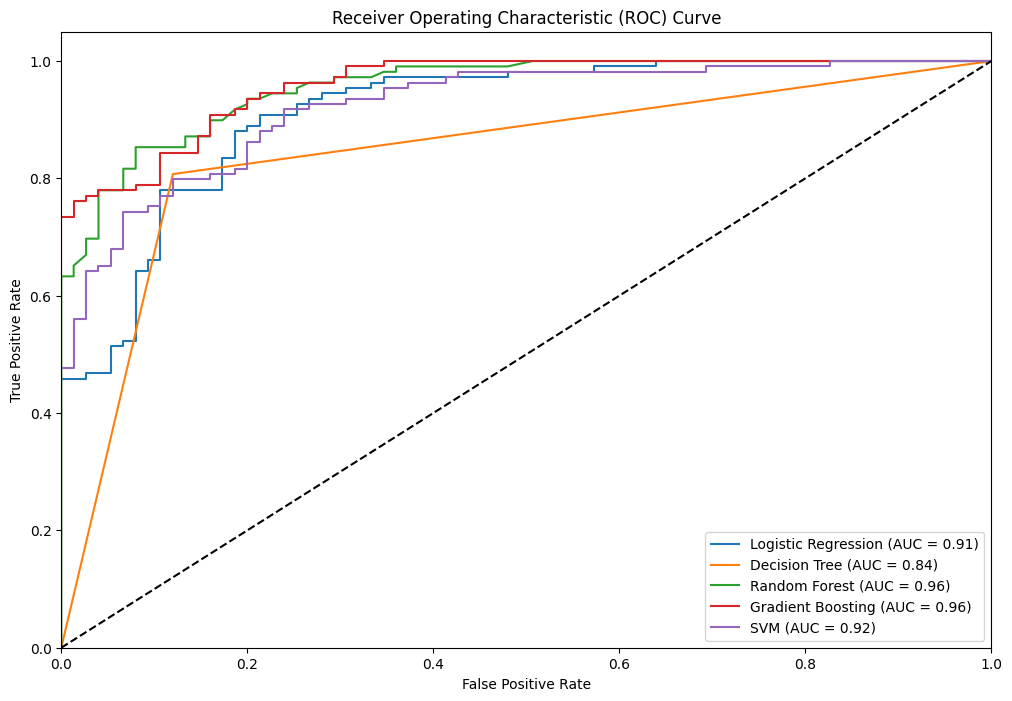

{'Logistic Regression': {'accuracy': 0.8532608695652174,
  'precision': 0.8727272727272727,
  'recall': 0.8807339449541285,
  'f1_score': 0.8767123287671234,
  'auc': 0.914617737003058,
  'confusion_matrix': array([[61, 14],
         [13, 96]]),
  'fpr': array([0.        , 0.        , 0.        , 0.02666667, 0.02666667,
         0.05333333, 0.05333333, 0.06666667, 0.06666667, 0.08      ,
         0.08      , 0.09333333, 0.09333333, 0.10666667, 0.10666667,
         0.17333333, 0.17333333, 0.18666667, 0.18666667, 0.2       ,
         0.2       , 0.21333333, 0.21333333, 0.25333333, 0.25333333,
         0.26666667, 0.26666667, 0.28      , 0.28      , 0.30666667,
         0.30666667, 0.33333333, 0.33333333, 0.34666667, 0.34666667,
         0.48      , 0.48      , 0.57333333, 0.57333333, 0.64      ,
         0.64      , 1.        ]),
  'tpr': array([0.        , 0.00917431, 0.4587156 , 0.4587156 , 0.46788991,
         0.46788991, 0.51376147, 0.51376147, 0.52293578, 0.52293578,
         0.6422

In [ ]:
# If target is not binary, convert it to binary (example: if there are multiple classes, binarize the problem)
# Assuming the target values are 0 for no disease and 1 for disease
# If necessary, convert other values to 1 (disease)
if len(unique_values) > 2:
    y = y.apply(lambda x: 1 if x != 0 else 0)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    auc = roc_auc_score(y_test, y_pred_prob)
    confusion_mat = confusion_matrix(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "auc": auc,
        "confusion_matrix": confusion_mat,
        "fpr": fpr,
        "tpr": tpr
    }

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    results[model_name] = train_evaluate_model(model)

# Plot AUC-ROC Curves
plt.figure(figsize=(12, 8))
for model_name, metrics in results.items():
    plt.plot(metrics["fpr"], metrics["tpr"], label=f'{model_name} (AUC = {metrics["auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Display results
results
